<a href="https://colab.research.google.com/github/Sizwe100/Python-Random-Forest/blob/main/Combined_Plots_with_EVI_DMI_Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.dates import DateFormatter, YearLocator

In [3]:
from google.colab import files
uploaded = files.upload()

Saving MonthlyDataLCUVS2.csv to MonthlyDataLCUVS2.csv


In [5]:
# Replace 'your_file.csv' with the actual name of your file
df = pd.read_csv('MonthlyDataLCUVS2.csv', delimiter= ';', skipinitialspace=True)

# Display the first few rows to understand the structure
print(df.head(2))

         date  SAVI_UVS  MSAVI_UVS  NDVI_UVS   EVI_UVS    RF_UVS    ET_UVS  \
0  2019/03/31  0.423300   0.415157  0.614560  0.456100  3.494194  3.793974   
1  2019/04/30  0.423543   0.413157  0.580767  0.475743  2.294667  2.762200   

   SPEI3_UVS  SPI3_UVS   VCI_UVS  ...  MSAVI_LC   NDVI_LC   EVI_LC     RF_LC  \
0   1.101960  0.300789  0.371444  ...  0.379540  0.614560  0.59602  5.594616   
1   0.097428  0.301395  0.468333  ...  0.327233  0.580767  0.53305  2.531303   

      ET_LC  SPEI3_LC   SPI3_LC  VCI_LC  Nino3.4_LC    DMI_LC  
0  4.062029  1.101960  0.762170   0.551    0.867725  0.377138  
1  2.988177  0.097428  0.066812   0.592    0.740107  0.442555  

[2 rows x 23 columns]


In [6]:
!pip install folium
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 72.8 MB/s eta 0:00:00


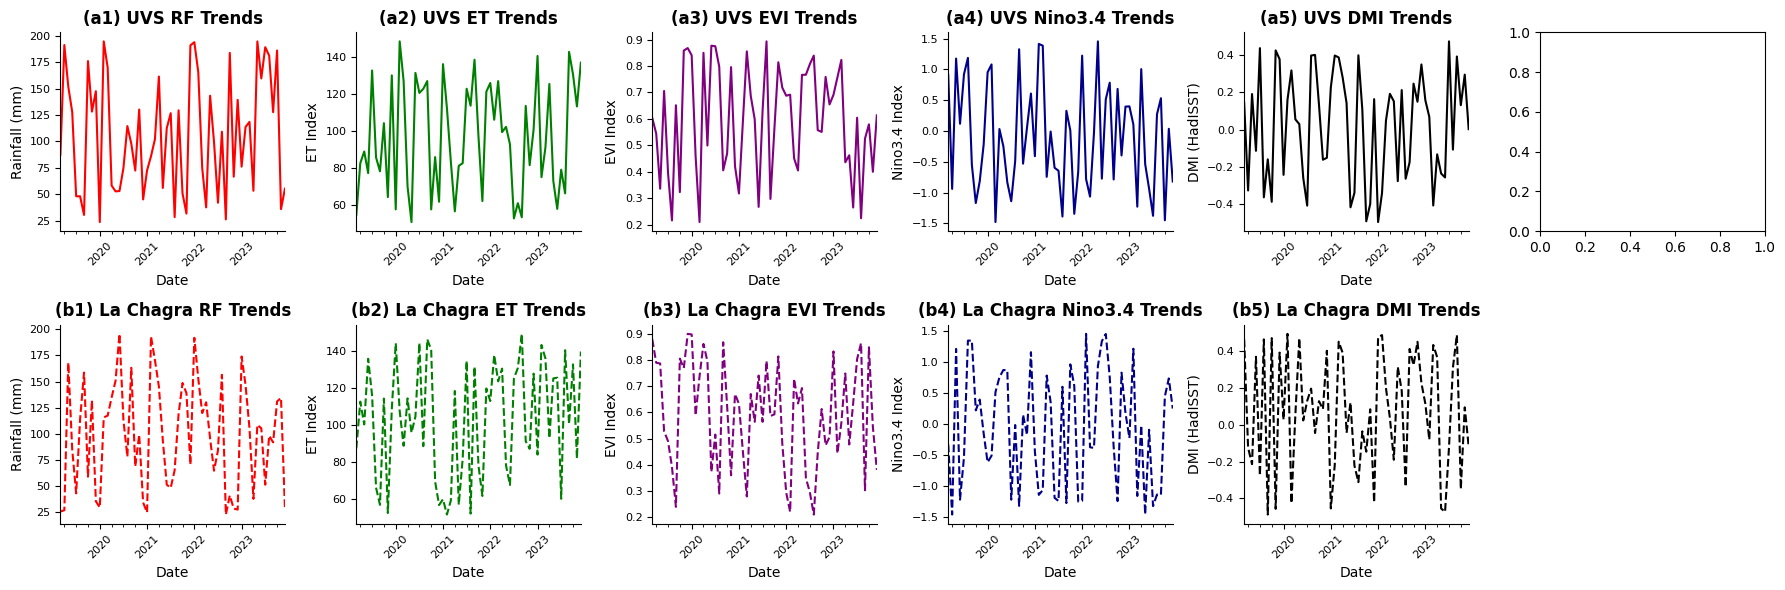

In [7]:
import numpy as np
import os

# Simulated dataset for demonstration purposes
np.random.seed(42)
dates = pd.date_range(start="2019-03-01", periods=58, freq='ME')  # Monthly end dates

def generate_random_data():
    return pd.DataFrame({
        'Date': dates,
        'RF': np.random.uniform(20, 200, len(dates)),  # Rainfall (in mm)
        'ET': np.random.uniform(50, 150, len(dates)),  # Evapotranspiration
        'Nino3.4': np.random.uniform(-1.5, 1.5, len(dates)),  # El Niño Index
        'DMI': np.random.uniform(-0.5, 0.5, len(dates)),  # Dipole Mode Index (HadISST)
        'EVI': np.random.uniform(0.2, 0.9, len(dates))  # EVI (Central Focus)
    }).set_index('Date')

# Create two datasets
df_uvs = generate_random_data()
df_lachagra = generate_random_data()

# Use the default Matplotlib style for a clean look
plt.style.use('default')

# Create a directory for saving plots
save_path = "plots"
os.makedirs(save_path, exist_ok=True)

# Create a 2x6 grid (side-by-side comparison for each variable)
fig, axes = plt.subplots(2, 6, figsize=(18, 6))

# Define plot details
plot_details = [
    ('RF', 'red', 'Rainfall (mm)'),
    ('ET', 'green', 'ET Index'),
    ('EVI', 'purple', 'EVI Index'),
    ('Nino3.4', 'darkblue', 'Nino3.4 Index'),
    ('DMI', 'black', 'DMI (HadISST)')
]

# Set font
plt.rcParams['font.family'] = 'Times New Roman'

# Loop through and plot each variable side by side
for i, (column, color, ylabel) in enumerate(plot_details):
    df_uvs[column].plot(ax=axes[0, i], color=color, linewidth=1.5)
    df_lachagra[column].plot(ax=axes[1, i], color=color, linewidth=1.5, linestyle='dashed')

    axes[0, i].set_title(f"(a{i+1}) UVS {column} Trends", fontsize=12, fontweight='bold')
    axes[1, i].set_title(f"(b{i+1}) La Chagra {column} Trends", fontsize=12, fontweight='bold')

    for ax in [axes[0, i], axes[1, i]]:
        ax.set_xlabel('Date', fontsize=10)
        ax.set_ylabel(ylabel, fontsize=10)
        ax.tick_params(axis='x', rotation=45, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
        ax.spines[['top', 'right']].set_visible(False)
        ax.set_facecolor('white')

# Remove empty subplot (last column in second row)
fig.delaxes(axes[1, 5])

# Adjust layout for compactness
plt.tight_layout()

# Save the combined figure
save_location = os.path.join(save_path, "UVS_vs_LaChagra_Comparison.png")
plt.savefig(save_location, dpi=300, bbox_inches='tight')

# Show the final combined plot
plt.show()

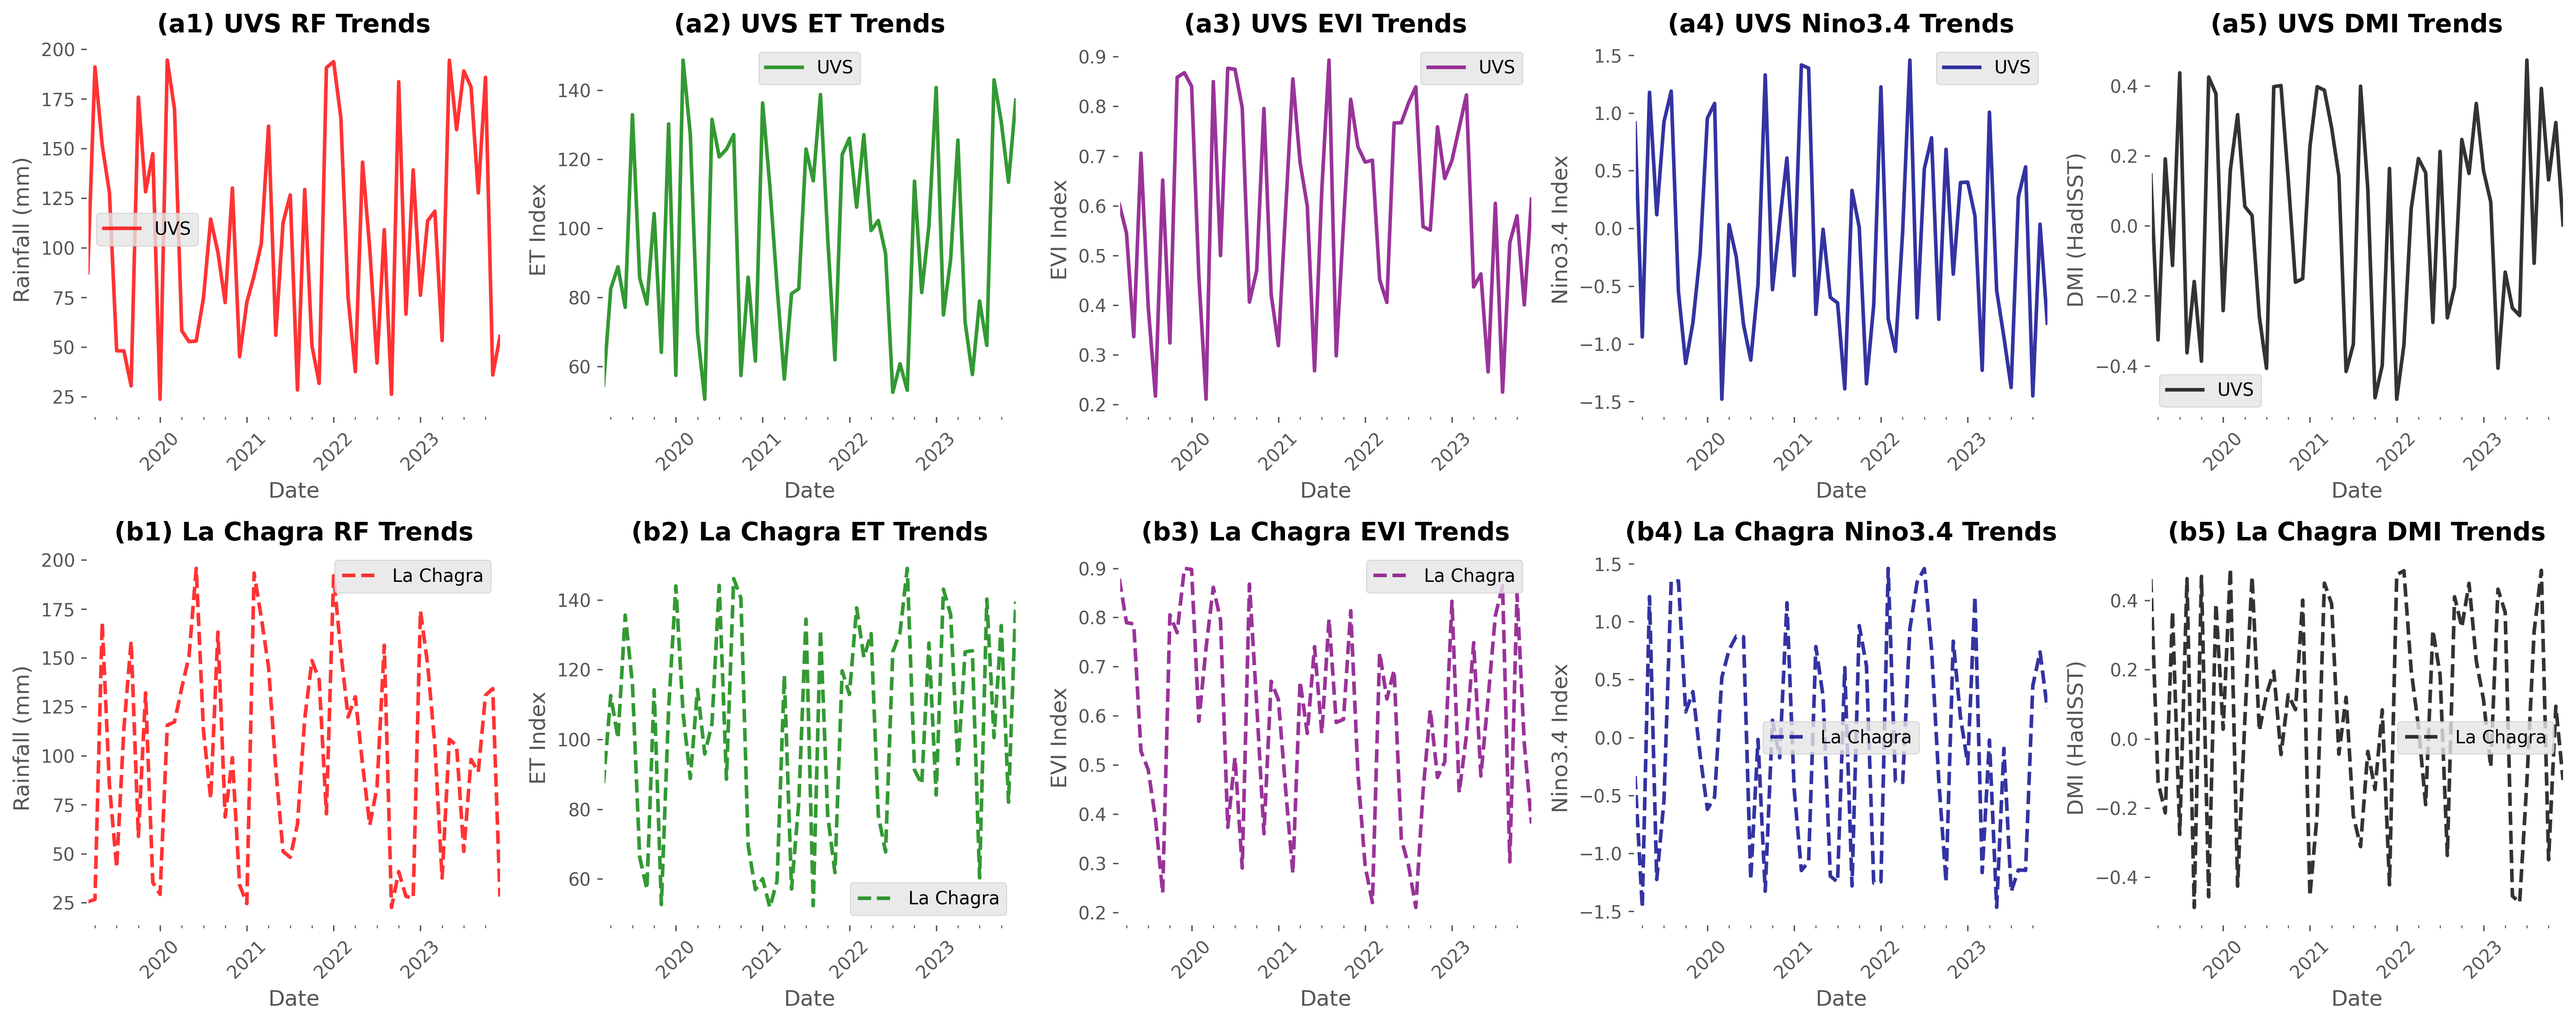

In [8]:
# Simulated dataset for demonstration purposes
np.random.seed(42)
dates = pd.date_range(start="2019-03-01", periods=58, freq='ME')  # Monthly end dates

def generate_random_data():
    return pd.DataFrame({
        'Date': dates,
        'RF': np.random.uniform(20, 200, len(dates)),  # Rainfall (in mm)
        'ET': np.random.uniform(50, 150, len(dates)),  # Evapotranspiration
        'Nino3.4': np.random.uniform(-1.5, 1.5, len(dates)),  # El Niño Index
        'DMI': np.random.uniform(-0.5, 0.5, len(dates)),  # Dipole Mode Index (HadISST)
        'EVI': np.random.uniform(0.2, 0.9, len(dates))  # EVI (Central Focus)
    }).set_index('Date')

# Create two datasets
df_uvs = generate_random_data()
df_lachagra = generate_random_data()

# Use a clean Matplotlib style
plt.style.use('ggplot')

# Create a directory for saving plots
save_path = "plots"
os.makedirs(save_path, exist_ok=True)

# Create a 2x5 grid (side-by-side comparison for each variable)
fig, axes = plt.subplots(2, 5, figsize=(20, 8), dpi=300)

# Define plot details
plot_details = [
    ('RF', 'red', 'Rainfall (mm)'),
    ('ET', 'green', 'ET Index'),
    ('EVI', 'purple', 'EVI Index'),
    ('Nino3.4', 'darkblue', 'Nino3.4 Index'),
    ('DMI', 'black', 'DMI (HadISST)')
]

# Set font
plt.rcParams['font.family'] = 'Times New Roman'

# Loop through and plot each variable side by side
for i, (column, color, ylabel) in enumerate(plot_details):
    df_uvs[column].plot(ax=axes[0, i], color=color, linewidth=2, alpha=0.8, label='UVS')
    df_lachagra[column].plot(ax=axes[1, i], color=color, linewidth=2, linestyle='dashed', alpha=0.8, label='La Chagra')

    axes[0, i].set_title(f"(a{i+1}) UVS {column} Trends", fontsize=14, fontweight='bold')
    axes[1, i].set_title(f"(b{i+1}) La Chagra {column} Trends", fontsize=14, fontweight='bold')

    for ax in [axes[0, i], axes[1, i]]:
        ax.set_xlabel('Date', fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.tick_params(axis='x', rotation=45, labelsize=10)
        ax.tick_params(axis='y', labelsize=10)
        ax.spines[['top', 'right']].set_visible(False)
        ax.set_facecolor('white')
        ax.legend()

# Adjust layout for clarity
plt.tight_layout()

# Save the combined figure
save_location = os.path.join(save_path, "UVS_vs_LaChagra_Comparison_Clean.png")
plt.savefig(save_location, dpi=300, bbox_inches='tight')

# Show the final combined plot
plt.show()

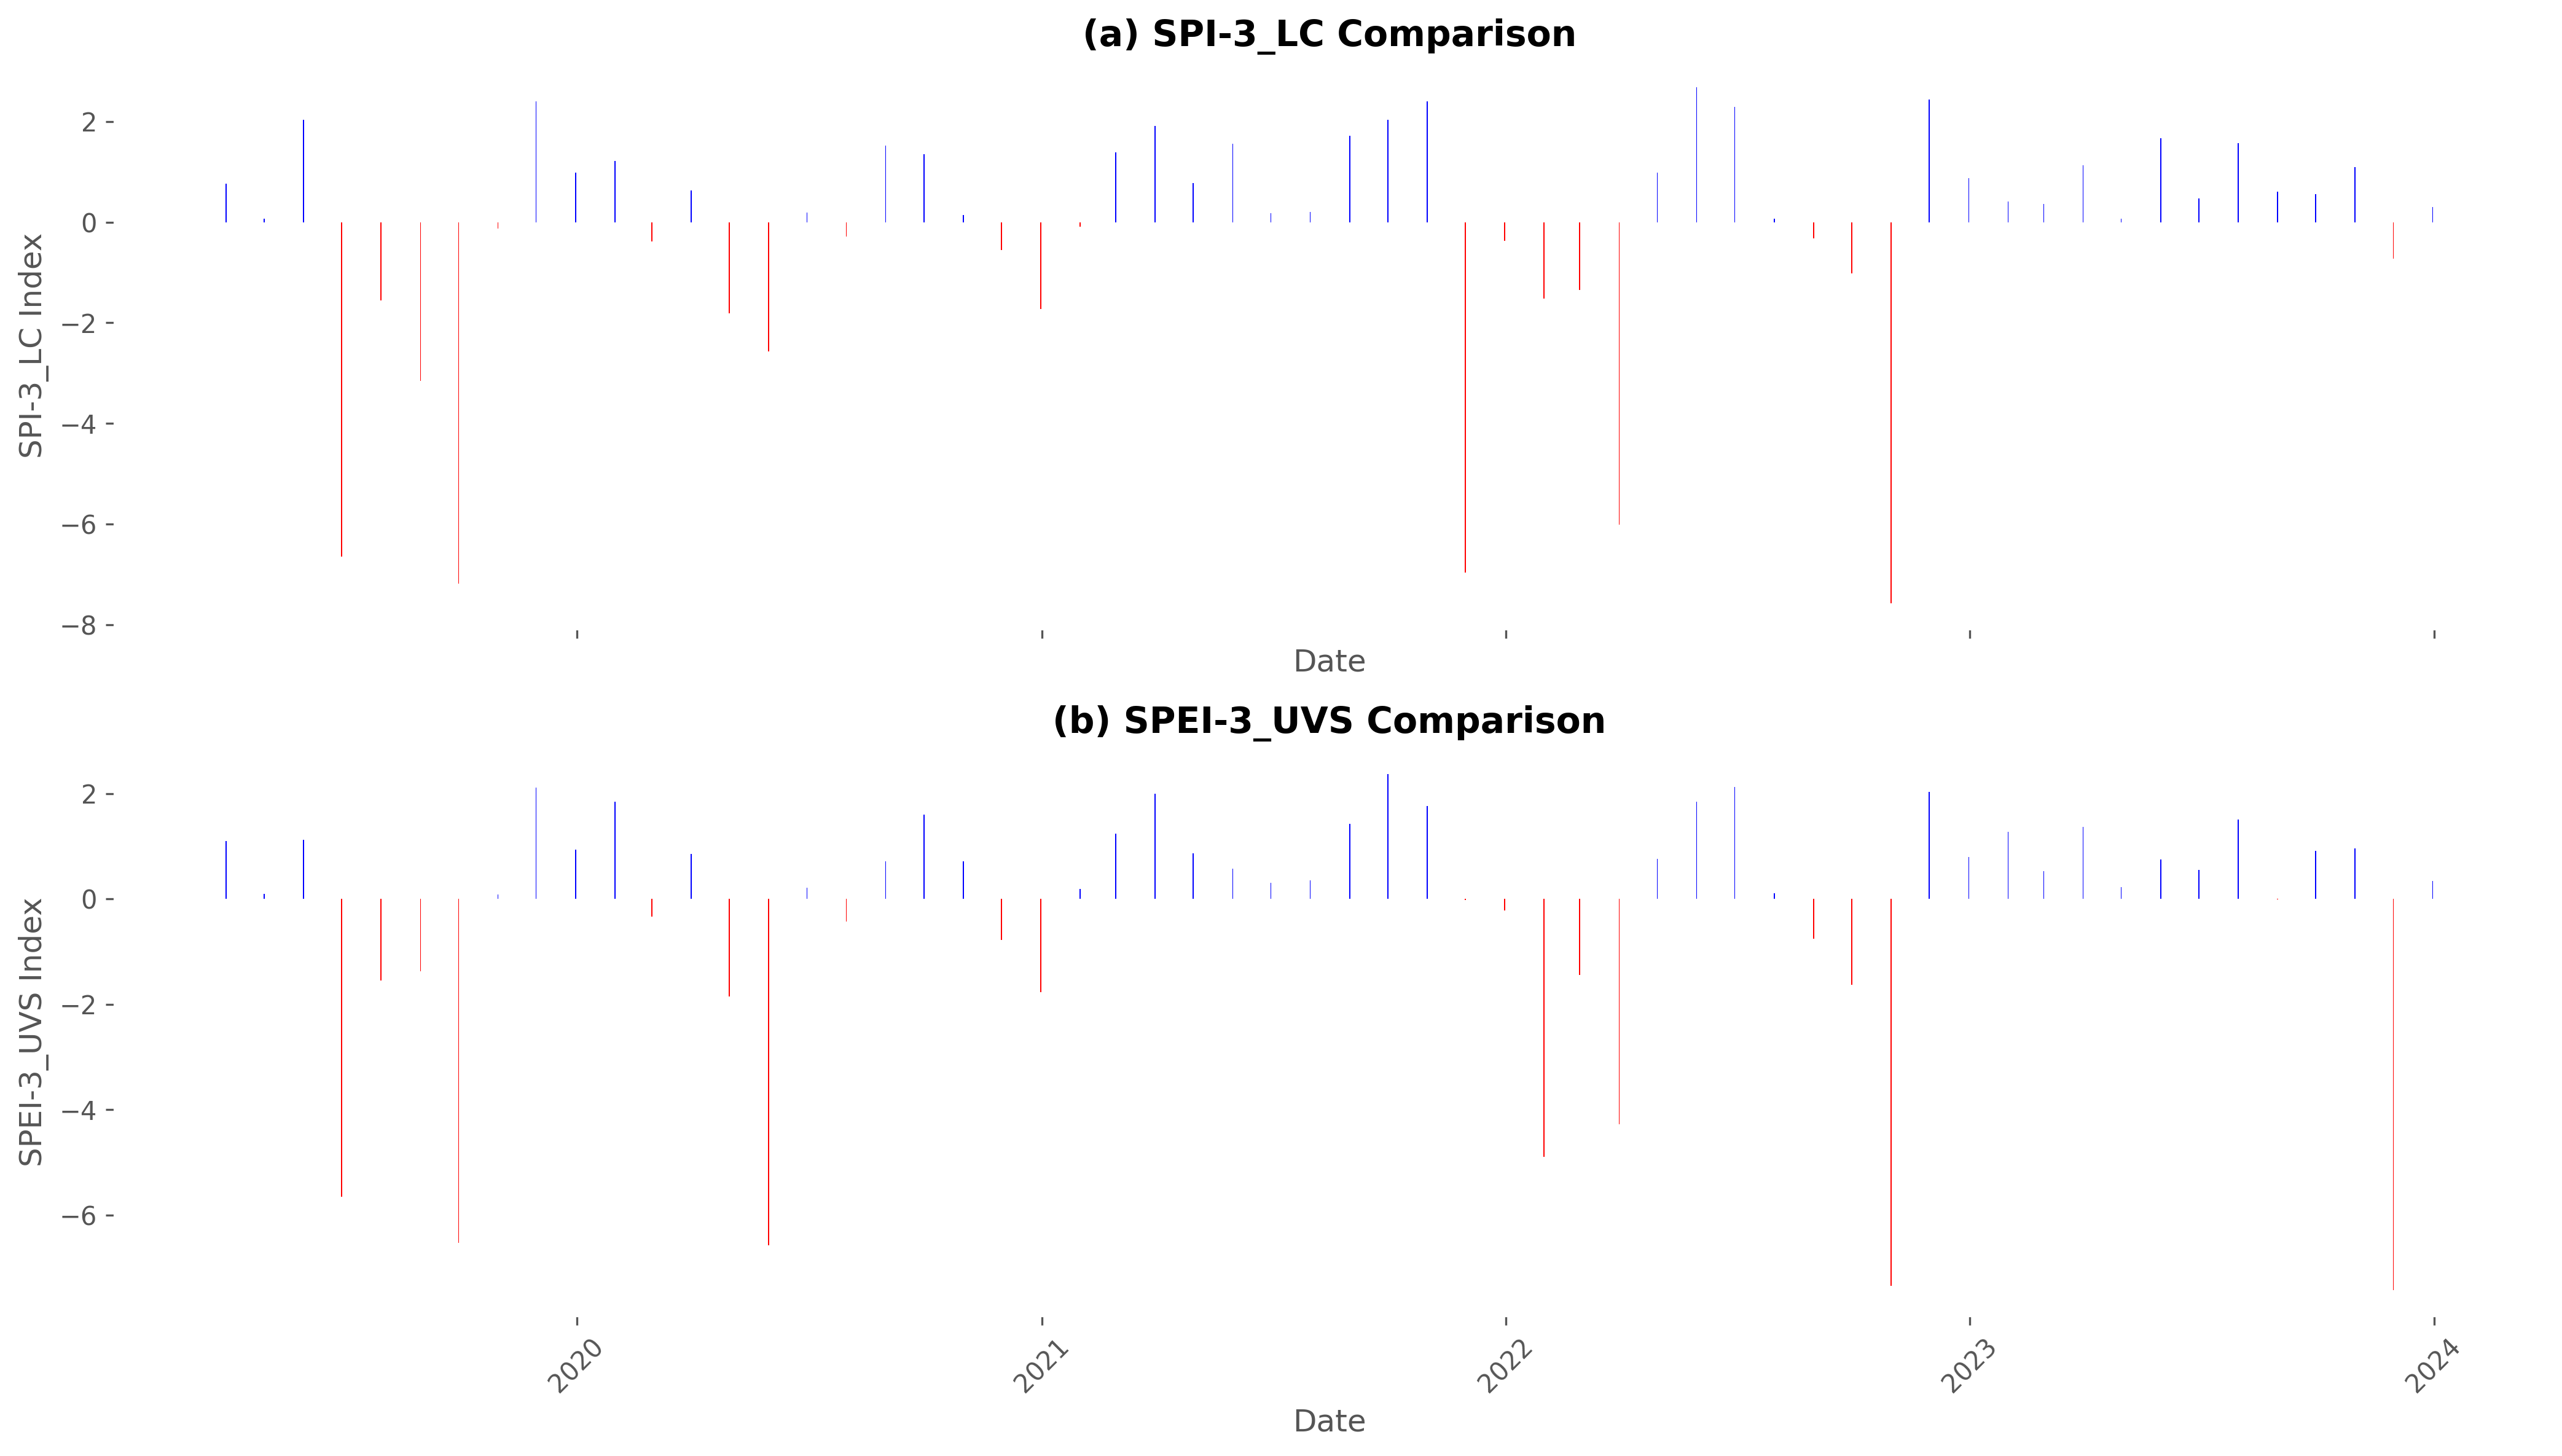

In [15]:
# Load dataset
file_path = "MonthlyDataLCUVS2.csv"
df = pd.read_csv(file_path, sep=";")

# Ensure date column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.set_index('date')

# Drop rows with missing values in key columns
df = df.dropna(subset=['SPI3_LC', 'SPEI3_LC', 'Nino3.4_LC', 'SPI3_UVS', 'SPEI3_UVS', 'Nino3.4_UVS'])

# Use a clean Matplotlib style
plt.style.use('ggplot')

# Create a directory for saving plots
save_path = "plots"
os.makedirs(save_path, exist_ok=True)

# Create a 2x1 grid (SPI3 and SPEI3 comparisons)
fig, axes = plt.subplots(2, 1, figsize=(14, 8), dpi=300, sharex=True)

# Set font
plt.rcParams['font.family'] = 'Times New Roman'

# Plot SPI3 Comparison
axes[0].bar(df.index, df['SPI3_LC'], color=np.where(df['SPI3_LC'] >= 0, 'blue', 'red'))
axes[0].set_title("(a) SPI-3_LC Comparison", fontsize=14, fontweight='bold')
axes[0].set_ylabel("SPI-3_LC Index", fontsize=12)
axes[0].grid(False)

# Plot SPEI3 Comparison
axes[1].bar(df.index, df['SPEI3_UVS'], color=np.where(df['SPEI3_UVS'] >= 0, 'blue', 'red'))
axes[1].set_title("(b) SPEI-3_UVS Comparison", fontsize=14, fontweight='bold')
axes[1].set_ylabel("SPEI-3_UVS Index", fontsize=12)
axes[1].grid(False)

# Format x-axis for both subplots
for ax in axes:
    ax.set_xlabel("Date", fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_facecolor('white')

# Adjust layout for clarity
plt.tight_layout()

# Save the combined figure
save_location = os.path.join(save_path, "SPI3_SPEI3_Comparison.png")
plt.savefig(save_location, dpi=300, bbox_inches='tight')

# Show the final combined plot
plt.show()


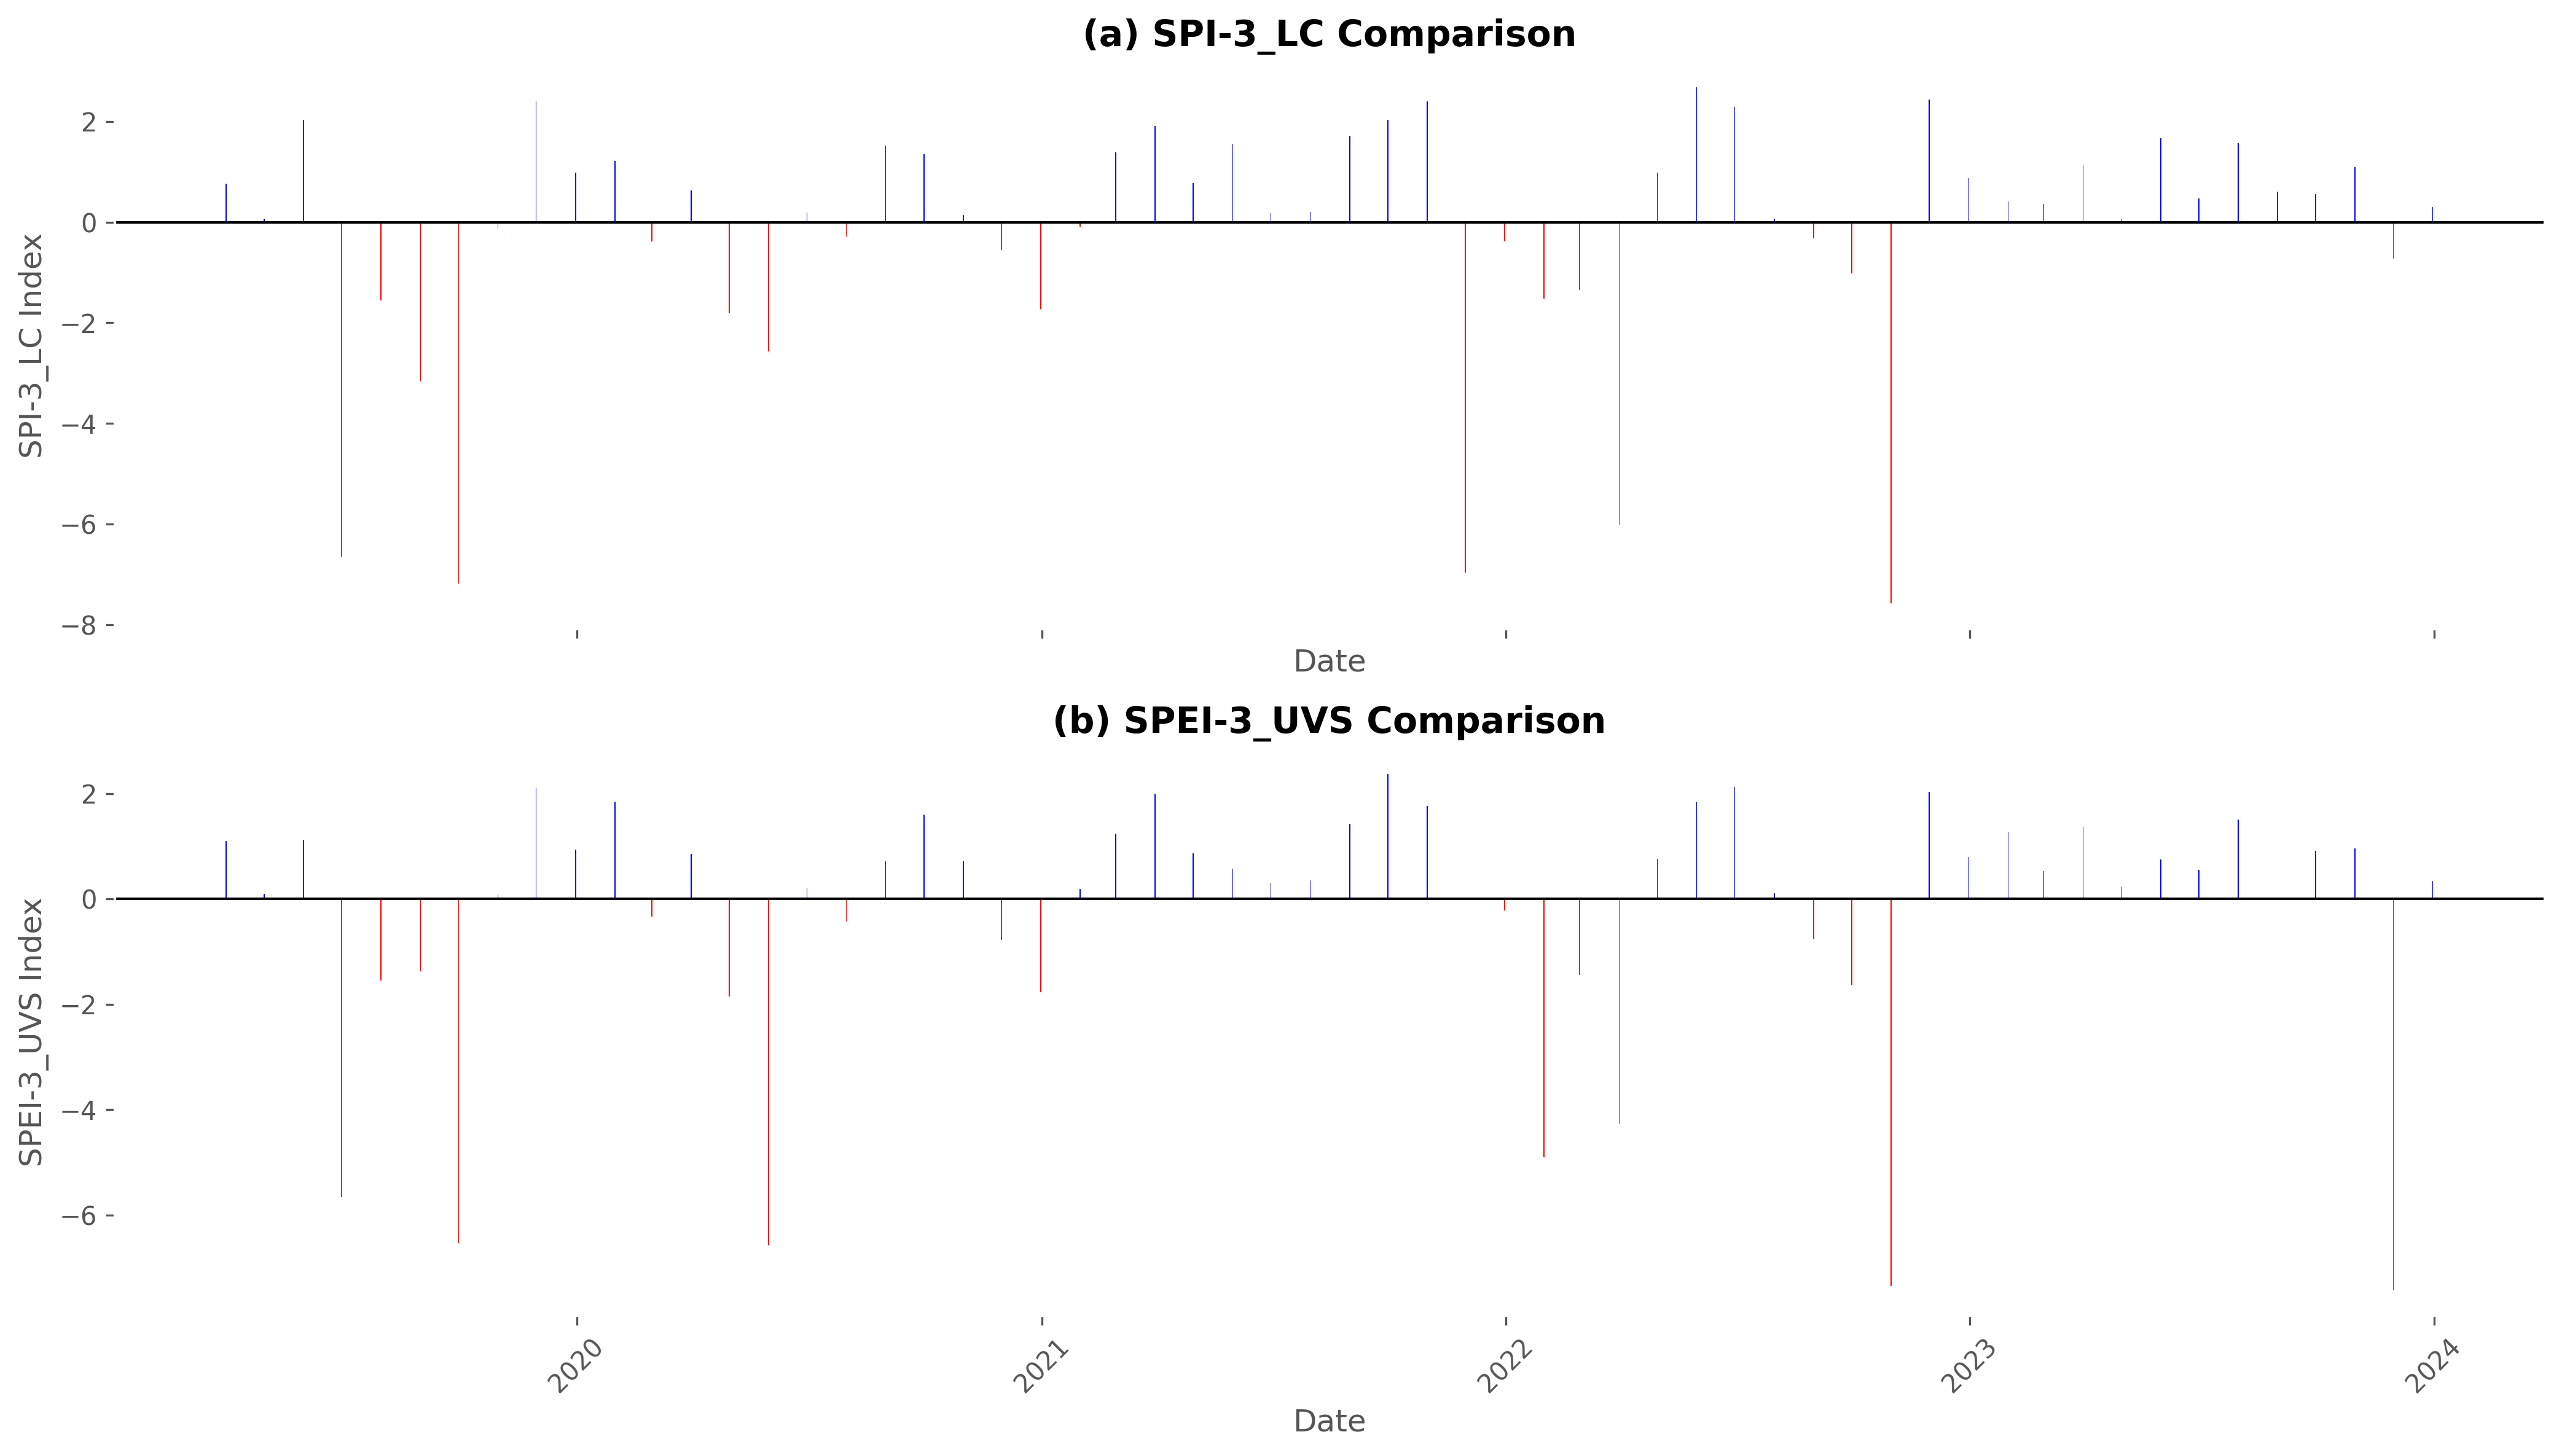

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Load dataset
file_path = "MonthlyDataLCUVS2.csv"
df = pd.read_csv(file_path, sep=";")

# Ensure date column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.set_index('date')

# Drop rows with missing values in key columns
df = df.dropna(subset=['SPI3_LC', 'SPEI3_LC', 'Nino3.4_LC', 'SPI3_UVS', 'SPEI3_UVS', 'Nino3.4_UVS'])

# Use a clean Matplotlib style
plt.style.use('ggplot')

# Create a directory for saving plots
save_path = "plots"
os.makedirs(save_path, exist_ok=True)

# Create a 2x1 grid (SPI3 and SPEI3 comparisons)
fig, axes = plt.subplots(2, 1, figsize=(14, 8), dpi=300, sharex=True)

# Set font
plt.rcParams['font.family'] = 'Times New Roman'

# Plot SPI3 Comparison with horizontal reference lines
axes[0].bar(df.index, df['SPI3_LC'], color=np.where(df['SPI3_LC'] >= 0, 'blue', 'red'))
axes[0].axhline(y=0, color='black', linewidth=1)  # Reference line at 0
axes[0].set_title("(a) SPI-3_LC Comparison", fontsize=14, fontweight='bold')
axes[0].set_ylabel("SPI-3_LC Index", fontsize=12)
axes[0].grid(False)

# Plot SPEI3 Comparison with horizontal reference lines
axes[1].bar(df.index, df['SPEI3_UVS'], color=np.where(df['SPEI3_UVS'] >= 0, 'blue', 'red'))
axes[1].axhline(y=0, color='black', linewidth=1)  # Reference line at 0
axes[1].set_title("(b) SPEI-3_UVS Comparison", fontsize=14, fontweight='bold')
axes[1].set_ylabel("SPEI-3_UVS Index", fontsize=12)
axes[1].grid(False)

# Format x-axis for both subplots
for ax in axes:
    ax.set_xlabel("Date", fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)
    ax.spines[['top', 'right']].set_visible(False)
    ax.set_facecolor('white')

# Adjust layout for clarity
plt.tight_layout()

# Save the combined figure
save_location = os.path.join(save_path, "SPI3_SPEI3_Comparison.png")
plt.savefig(save_location, dpi=300, bbox_inches='tight')

# Show the final combined plot
plt.show()
